In [883]:
import warnings
warnings.filterwarnings('ignore')

In [884]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [885]:
housing = pd.read_csv('Housing.csv')
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [886]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [887]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [888]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [889]:
housing.mainroad=le.fit_transform(housing['mainroad'])
housing.guestroom=le.fit_transform(housing['guestroom'])
housing.basement=le.fit_transform(housing['basement'])
housing.hotwaterheating=le.fit_transform(housing['hotwaterheating'])
housing.airconditioning=le.fit_transform(housing['airconditioning'])
housing.prefarea=le.fit_transform(housing['prefarea'])

In [890]:
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [891]:
status = pd.get_dummies(housing['furnishingstatus'])
status.head(5)

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [892]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status.head(5)

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [893]:
housing = pd.concat([housing,status], axis = 1)
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [894]:
housing.drop(labels='furnishingstatus', axis = 1, inplace=True)
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [895]:
#sns.pairplot(housing)

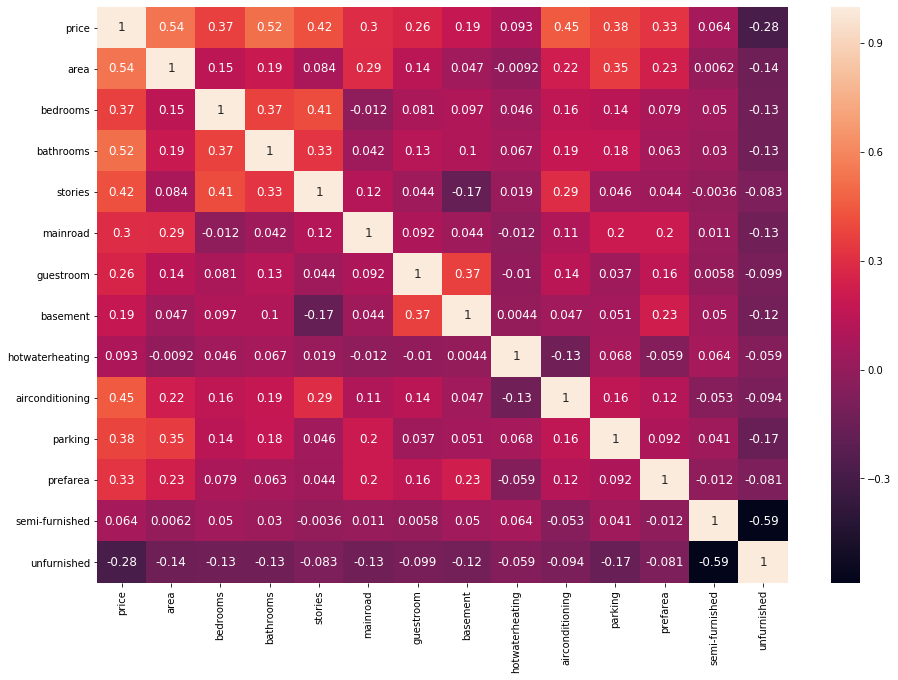

In [896]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
sns.heatmap(housing.corr(),annot=True, annot_kws={'size':12})

In [897]:
#sns.scatterplot(data=housing['price'])

In [898]:
#plt.scatter(housing['price'],housing['area'])

In [899]:
x=housing.drop(labels=['price'],axis=1)
y=housing.price

In [900]:
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [901]:
#plt.scatter(x.columns,y)

In [902]:
from sklearn.model_selection import train_test_split

In [903]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=101)

In [904]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     66.96
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           2.14e-88
Time:                        16:51:50   Log-Likelihood:                -5816.0
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     367   BIC:                         1.172e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.479e+04   3.01e+05     

In [905]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [906]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,bedrooms,16.17
2,bathrooms,9.42
0,area,8.15
3,stories,7.97
4,mainroad,6.26
11,semi-furnished,2.29
6,basement,2.07
12,unfurnished,1.99
9,parking,1.95
8,airconditioning,1.81


In [907]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [908]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished']
x_train[num_vars] = scaler.fit_transform(x_train)

In [909]:
x_train.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
227,0.296552,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.0,0.0
319,0.089655,0.6,0.000000,0.666667,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,1.0,0.0
367,0.133103,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0
515,0.104138,0.4,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0
143,0.213793,0.8,0.333333,0.666667,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,1.0


In [910]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [911]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,10) # Running RFE
rfe = rfe.fit(x_train, y_train)

In [912]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 2),
 ('guestroom', False, 3),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', True, 1)]

In [913]:
x = x_train.drop(labels=['semi-furnished','guestroom','mainroad','bedrooms'],axis=1)

In [914]:
x_train_lm = sm.add_constant(x)
lr = sm.OLS(y_train,x_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     94.86
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.36e-90
Time:                        16:52:06   Log-Likelihood:                -5820.0
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     371   BIC:                         1.170e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.352e+06   1.33e+05     

In [915]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,area,3.07
2,stories,2.04
6,parking,1.87
5,airconditioning,1.77
1,bathrooms,1.64
3,basement,1.56
7,prefarea,1.44
8,unfurnished,1.28
4,hotwaterheating,1.11


In [916]:
rfe = RFE(lm,10) # Running RFE
rfe = rfe.fit(x, y_train)
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('unfurnished', True, 1)]

# For Test Data

In [917]:
x_test = x_test.drop(labels=['semi-furnished','guestroom','mainroad','bedrooms'],axis=1)

In [918]:
x_test.head(5)

,area,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
225,6440,1,1,0,0,1,3,0,0
18,4600,2,2,0,0,1,2,0,0
48,4300,2,2,1,0,0,1,0,1
355,8250,1,1,0,0,0,2,0,0
350,3420,1,2,0,1,0,1,0,0


In [919]:
x_test = pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)
x_test.head(5)

,area,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,0.458812,0.0,0.000000,0.0,0.0,1.0,1.000000,0.0,0.0
1,0.282567,0.5,0.333333,0.0,0.0,1.0,0.666667,0.0,0.0
2,0.253831,0.5,0.333333,1.0,0.0,0.0,0.333333,0.0,1.0
3,0.632184,0.0,0.000000,0.0,0.0,0.0,0.666667,0.0,0.0
4,0.169540,0.0,0.333333,0.0,1.0,0.0,0.333333,0.0,0.0


In [920]:
rfe = RFE(lm,10) # Running RFE
rfe = rfe.fit(x_test, y_test)
list(zip(x_test.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('unfurnished', True, 1)]

In [921]:
#y_test = list(y_test)

In [922]:
y_test = list(y_test)

In [923]:
print(type(x_test_lm),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'list'>


In [924]:
x_test_lm = sm.add_constant(x_test)
lr = sm.OLS(y_test,x_test_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     28.68
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           9.13e-29
Time:                        16:52:08   Log-Likelihood:                -2514.7
No. Observations:                 164   AIC:                             5049.
Df Residuals:                     154   BIC:                             5080.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.603e+06   2.37e+05     

In [925]:
vif = pd.DataFrame()
vif['Features'] = x_test.columns
vif['VIF'] = [variance_inflation_factor(x_test.values, i) for i in range(x_test.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,area,3.54
2,stories,2.15
6,parking,2.14
5,airconditioning,1.71
7,prefarea,1.59
1,bathrooms,1.54
3,basement,1.49
8,unfurnished,1.23
4,hotwaterheating,1.05
